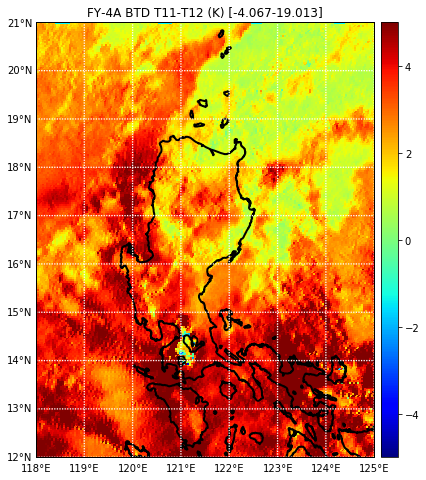

In [22]:
# To plot FY-4A BTD plot (T11-T12) by jhlee

import os
os.environ['PROJ_LIB']='/home/jhlee/anaconda3/envs/JUPYTER/share/proj'
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


# Read FY-4A channel 12 and 13 digital numbers
dir = '/storage1/jhlee/NMSC_2018/FY_4A_AGRI/'
sttime = '20200112080000'
edtime = '20200112081459'
fname = dir + 'FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_'+sttime+'_'+edtime+'_4000M_V0001.HDF'
f = Dataset(fname, 'r')
dn11 = f.variables['NOMChannel12'][:]
dn12 = f.variables['NOMChannel13'][:]


# Read 4 km lat/lon
f = Dataset(dir + 'LatLon_4000m.nc', 'r')
lat = f.variables['Latitude'][:]
lon = f.variables['Longitude'][:]


# Convert DN to TB
scale_11  = -0.003990
offset_11 = 16.344793
lamda_11  = 10.8

scale_12  = -0.003503
offset_12 = 14.354327
lamda_12  = 12.0

rad_11 = scale_11 * dn11 + offset_11
rad_12 = scale_12 * dn12 + offset_12

c1 = 1.191042E08  # W/m2-sr-um
c2 = 1.4387752E04 # K/um

tb_11 = c2 / ( lamda_11 * np.log( 1.+ c1/(rad_11 * lamda_11 **5) ) )
tb_12 = c2 / ( lamda_12 * np.log( 1.+ c1/(rad_12 * lamda_12 **5) ) )



# Target area
llcrnrlat = 12
urcrnrlat = 21
llcrnrlon = 118
urcrnrlon = 125
btd_11_12 = tb_11 - tb_12
btd_11_12[lat < llcrnrlat] = np.nan
btd_11_12[lat > urcrnrlat] = np.nan
btd_11_12[lon < llcrnrlon] = np.nan
btd_11_12[lon > urcrnrlon] = np.nan



# Plot BTD (T11-T12) map
plt.figure(figsize=(8,8))


map = Basemap(projection='cyl', llcrnrlat= llcrnrlat, urcrnrlat = urcrnrlat,\
              llcrnrlon = llcrnrlon, urcrnrlon = urcrnrlon, resolution = 'h')

x, y = map(lon, lat)

cs = map.pcolormesh(x,y,btd_11_12, shading='flat', cmap=plt.cm.jet)

map.drawcoastlines(linewidth=2)

map.drawparallels(np.arange(llcrnrlat,urcrnrlat+1,1.), labels=[True,False,False,False], color='white', linewidth=1.3)
map.drawmeridians(np.arange(llcrnrlon,urcrnrlon+1,1.), labels=[False,False,False,True], color='white', linewidth=1.3)
map.drawmapboundary(fill_color='aqua') 

plt.clim(-5,5) # colorbar range
cb = map.colorbar(cs, "right")


# show result plot
minval = np.nanmin(btd_11_12)
maxval = np.nanmax(btd_11_12)
plt.title("FY-4A BTD T11-T12 (K) [%5.3f-%6.3f]" %(minval,maxval)) 
plt.savefig('../plots/FY4A_BTD_11_12_'+sttime+'.png', dpi=300)
plt.show()
